## Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## The Data

**Read the yelp.csv file and set it as a dataframe called yelp.**

In [2]:
df = pd.read_csv('/home/shaury/Desktop/pvsc/data.sci/python/Refactored_Py_DS_ML_Bootcamp-master/20-Natural-Language-Processing/yelp.csv')

In [3]:
df.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   business_id  10000 non-null  object
 1   date         10000 non-null  object
 2   review_id    10000 non-null  object
 3   stars        10000 non-null  int64 
 4   text         10000 non-null  object
 5   type         10000 non-null  object
 6   user_id      10000 non-null  object
 7   cool         10000 non-null  int64 
 8   useful       10000 non-null  int64 
 9   funny        10000 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 781.4+ KB


In [5]:
df.describe()

,stars,cool,useful,funny
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.777500,0.876800,1.409300,0.701300
std,1.214636,2.067861,2.336647,1.907942
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,1.000000,0.000000
75%,5.000000,1.000000,2.000000,1.000000
max,5.000000,77.000000,76.000000,57.000000


## creating a column for checking the relation between star rating and length of the strings

In [6]:
def length(x):
    return len(x.split())
df['len'] = df['text'].map(length)

# EDA

Let's explore the data

In [7]:
sns.set_style('whitegrid')

array([[<AxesSubplot:title={'center':'1'}>,
        <AxesSubplot:title={'center':'2'}>],
       [<AxesSubplot:title={'center':'3'}>,
        <AxesSubplot:title={'center':'4'}>],
       [<AxesSubplot:title={'center':'5'}>, <AxesSubplot:>]], dtype=object)

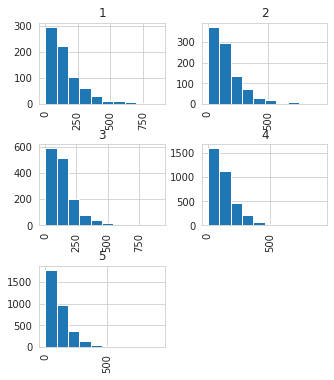

In [8]:
df['len'].hist(by=df['stars'],figsize=(5,6))

## from the above graphs it is clear that the reviews with more star rating tend to have more words than the less star ratings 

<AxesSubplot:xlabel='stars', ylabel='len'>

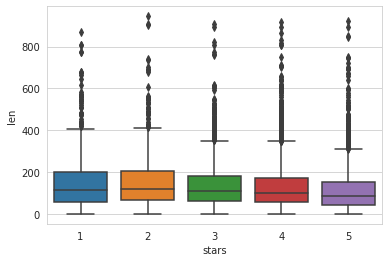

In [9]:
sns.boxplot(x=df['stars'],y=df['len'])

<AxesSubplot:xlabel='stars', ylabel='count'>

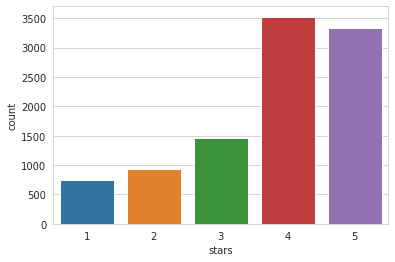

In [10]:
sns.countplot(x=df['stars'])

In [11]:
df.groupby('stars').aggregate([np.mean])

,cool,useful,funny,len
,mean,mean,mean,mean
stars,,,,
1,0.576769,1.604806,1.056075,153.953271
2,0.719525,1.563107,0.875944,156.435814
3,0.788501,1.306639,0.694730,140.714579
4,0.954623,1.395916,0.670448,131.174135
5,0.944261,1.381780,0.608631,114.463590


## checking the correlation between the dataset features

In [12]:
df.corr()

,stars,cool,useful,funny,len
stars,1.000000,0.052555,-0.023479,-0.061306,-0.121799
cool,0.052555,1.000000,0.887102,0.764342,0.237478
useful,-0.023479,0.887102,1.000000,0.723406,0.290245
funny,-0.061306,0.764342,0.723406,1.000000,0.249076
len,-0.121799,0.237478,0.290245,0.249076,1.000000


<AxesSubplot:>

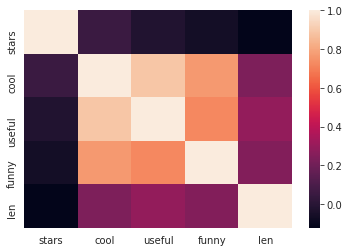

In [13]:
sns.heatmap(df.corr())

## NLP Classification Task

Let's move on to the actual task.

In [14]:
x = df['text']
y = df['stars']

## cleaning the text by removing the speacial characters,stop words and repetative words

In [15]:
from nltk.corpus import stopwords
stwords = stopwords.words('english')
def text_process(x):
    spec_chars = ["!",'"',"#","%","&","'","(",")",
              "*","+",",","-",".","/",":",";","<",
              "=",">","?","@","[","\\","]","^","_",
              "`","{","|","}","~","–"]
    newx = [w for w in x if w not in spec_chars]
    nex = "".join(newx)
    newx = nex.split()
    return " ".join(np.unique([w for w in newx if w not in stwords]))

In [16]:
df['text'] = df['text'].map(text_process)

In [17]:
df.text = df.text.str.replace("\d+","")

/tmp/ipykernel_10382/740739047.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df.text = df.text.str.replace("\d+","")


In [18]:
df.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,len
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,Anyway Bloody Do EVERYTHING I Im It Ive Mary ...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,155
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,Beef Both Everyone Heres I In It My PM So...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0,257
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,I Rice also candy dig good gyro love plate sel...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0,16
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,Chaparral Dakota Dept Dog I Its LOVE Park Rec ...,review,uZetl9T0NcROGOyFfughhg,1,2,0,76
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General I Id Like Manager Mistakes Not Petello...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0,86


now we drop the columns which are not neccessary such as user id,date,review id,type and business id.

In [22]:
df.drop(['business_id','date','review_id','type','user_id','cool','useful','funny'],axis=1,inplace=True)

now we need to make the data clean for the models hence we convert all the text data to lower case and remove the repetitive words.

In [24]:
df['text'] = df['text'].str.lower()

In [25]:
def uniquewords(x):
    return " ".join(np.unique([w for w in x.split()]))

In [26]:
df['text'] = df['text'].map(uniquewords)

In [27]:
df['len'] = df['text'].map(length)

In [28]:
df.head()

,stars,text,len
0,5,absolute absolutely amazing anyway arrived bac...,77
1,5,arrived awesome back bad baked beef better bot...,94
2,4,also candy dig good gyro i love plate rice sel...,10
3,5,area ballparks baseball cans chaparral clean c...,43
4,5,albeit always assure awesome case customer det...,41


In [30]:
df.corr()

,stars,len
stars,1.000000,-0.100488
len,-0.100488,1.000000


In [31]:
from sklearn.feature_extraction.text import CountVectorizer

In [32]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(df['text'],df['stars'],test_size=0.2)

In [33]:
x_train_cv = CountVectorizer().fit(xtrain).transform(xtrain)
x_test_cv = CountVectorizer().fit(xtrain).transform(xtest)

In [34]:
x_train_cv

<8000x31026 sparse matrix of type '<class 'numpy.int64'>'
	with 481615 stored elements in Compressed Sparse Row format>

In [35]:
x_test_cv

<2000x31026 sparse matrix of type '<class 'numpy.int64'>'
	with 114905 stored elements in Compressed Sparse Row format>

In [37]:
from sklearn.feature_extraction.text import TfidfTransformer

In [38]:
xtfidf = TfidfTransformer().fit(x_train_cv).transform(x_train_cv).toarray()
xtfidf_ = TfidfTransformer().fit(x_train_cv).transform(x_test_cv).toarray()

In [39]:
from sklearn.naive_bayes import MultinomialNB

In [42]:
model = MultinomialNB()
model.fit(xtfidf,ytrain)

MultinomialNB()

In [43]:
prd = model.predict(xtfidf_)

In [44]:
from sklearn.metrics import accuracy_score
accuracy_score(prd,ytest)

0.44

In [45]:
from sklearn.ensemble import RandomForestClassifier

In [46]:
rfc = RandomForestClassifier()
rfc.fit(xtfidf,ytrain)

RandomForestClassifier()

In [47]:
prdrfc = rfc.predict(xtfidf_)

In [48]:
accuracy_score(prdrfc,ytest)

0.4715

In [49]:
from xgboost import XGBClassifier

In [50]:
xgmodel = XGBClassifier()

In [51]:
xgmodel.fit(xtfidf,ytrain)
prd2 = xgmodel.predict(xtfidf_)

/home/shaury/.local/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:33:38] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


KeyboardInterrupt: 

## applying the method of stemming to remove the words with same stem word

In [ ]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()
def stm(x):
    newx = x.split()
    wrd = []
    for i in newx:
        wrd.append(ps.stem(i))
    return " ".join(np.unique(wrd))

In [ ]:
df['text'] = df['text'].map(stm)

In [ ]:
x = df['text']
y = df['stars']

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
xfit = CountVectorizer()

## Train Test Split

Let's split our data into training and testing data.


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
xtrain = CountVectorizer().fit(x_train).transform(x_train)
xtest = CountVectorizer().fit(x_train).transform(x_test)

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer
xtfidf = TfidfTransformer().fit(xtrain).transform(xtrain).toarray()
xtfidf_ = TfidfTransformer().fit(xtrain).transform(xtest).toarray()

## Training a Model

Time to train a model!

In [ ]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(xtfidf,y_train)

## Predictions and Evaluations

Time to see how our model did!

**Use the predict method off of nb to predict labels from X_test.**

In [ ]:
prd = model.predict(xtfidf_)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(prd,y_test)

# Great Job!